# Импортирование библиотек и загрузка данных

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Описательные статистики

In [75]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [76]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [77]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [78]:
df['charges'].nunique()

1337

# Удаление дубликатов

In [79]:
df.duplicated().sum()

np.int64(1)

In [80]:
df[df['charges'].duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [81]:
df = df.drop_duplicates()

In [82]:
df.duplicated().sum()

np.int64(0)

# Распределение дискретных признаков

In [83]:
len(df[df['sex']=='female']),len(df[df['sex']=='male'])

(662, 675)

<Axes: xlabel='sex', ylabel='count'>

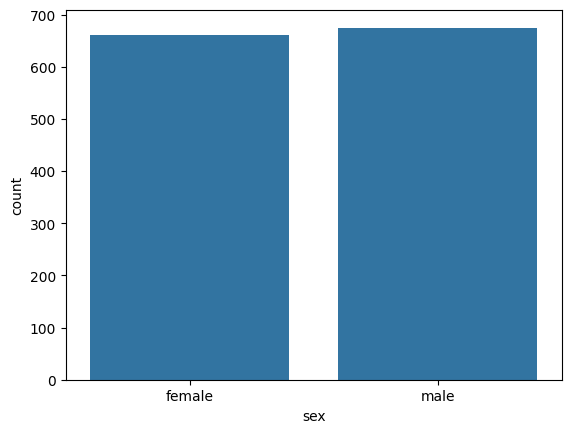

In [84]:
sns.countplot(data=df,x ='sex')

In [85]:
len(df[df['smoker']=='yes']),len(df[df['smoker']=='no'])

(274, 1063)

<Axes: xlabel='smoker', ylabel='count'>

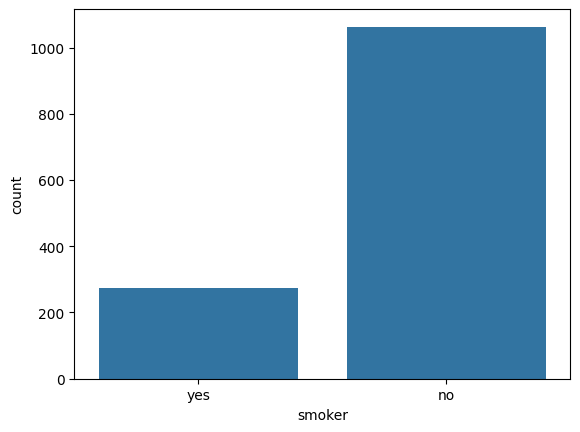

In [86]:
sns.countplot(data=df,x='smoker')

In [90]:
uniq_reg = df['region'].unique()
uniq_reg

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [93]:
for reg in uniq_reg:
    print(f'{reg} : {len(df[df["region"]==reg])}')


southwest : 325
southeast : 364
northwest : 324
northeast : 324


<Axes: xlabel='region', ylabel='count'>

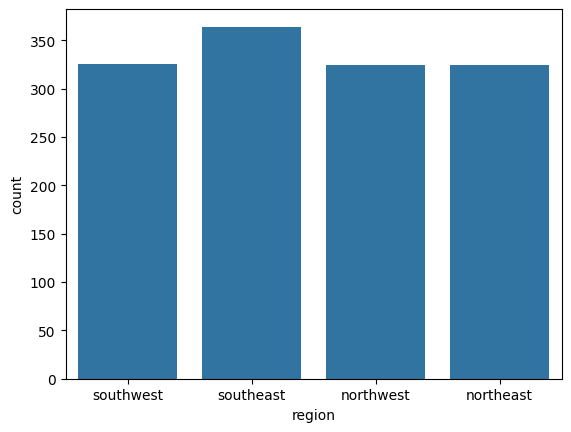

In [94]:
sns.countplot(data=df,x='region')

<Axes: xlabel='children', ylabel='count'>

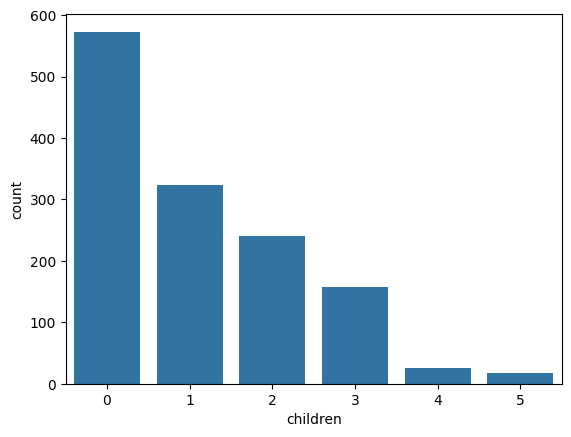

In [95]:
sns.countplot(data=df,x='children')

In [96]:
len(df[df['children']>0]),len(df[df['children']==0])

(764, 573)

Некоторые выводы:
1. Мужчин и женщин примерно одинаково.
2. Некурящих очень много по сравнению с курящими.
3. получателей в юго-восточных регионах чуть больше чем в остальных, остальные примерно одинаковые.
4. Людей без детей намного больше, по сравнению с остальными поотдельности, но меньше, если сравнить с количеством людей с детьми в принципе.
    


Что интересно дальше посмотреть по этим признакам?

1. Зависимости остальных дискретных факторов от курения (это самое основное, что интересует).
2. Зависимость региона и количества детей.

# Зависимости признаков от курения

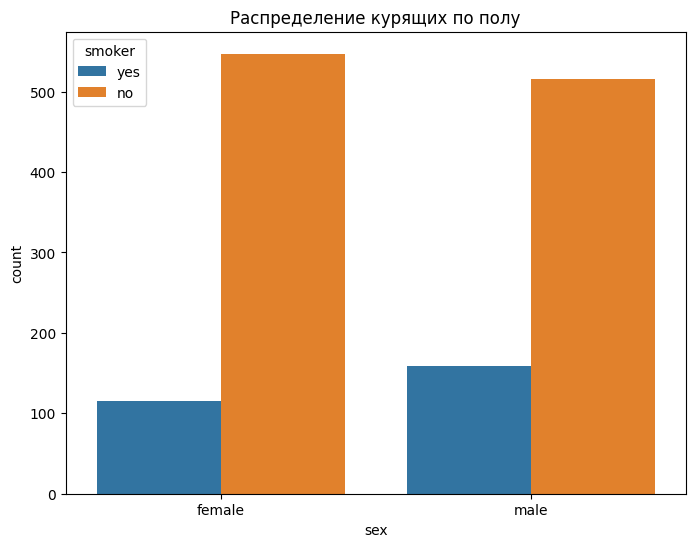

In [99]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='sex',hue='smoker')
plt.title('Распределение курящих по полу')
plt.show()

Видим, что курящих мужчин больше, чем курящих женщин.  
Также видим что некурящих женщин больше чем некурящих мужчин, хотя в общем мужчин больше чем женщин

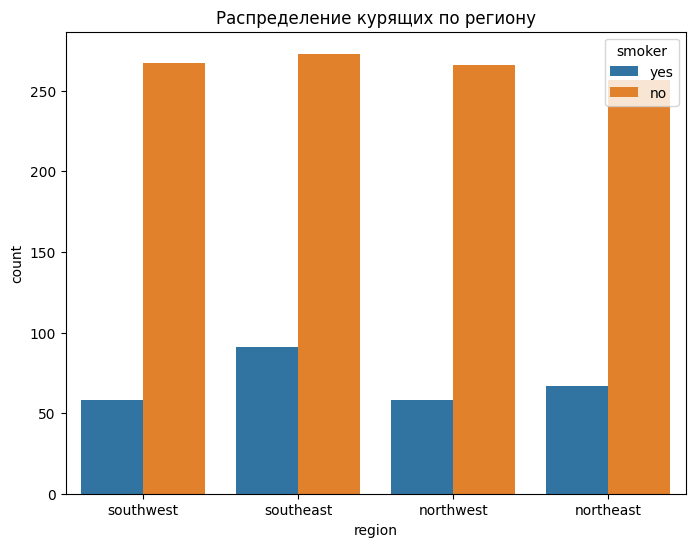

In [100]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='region',hue='smoker')
plt.title('Распределение курящих по региону')
plt.show()

Выводы:  
1. на юго-востоке курящих больше чем в остальных частях
2. курящих в остальных частях примерно одинаково, по на северо-востоке чуть больше
3. Некурящих больше всего на юго-востоке, меньше всего на северо-востоке
3. Западная часть ведет себя примерно одинаково и на юге и на севере

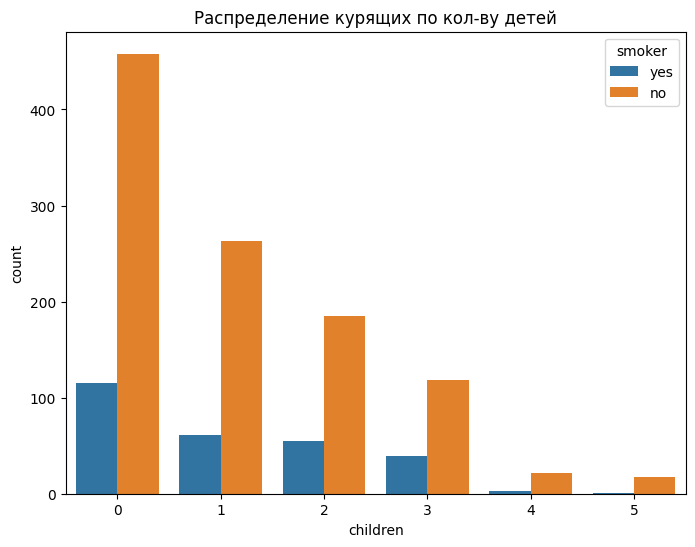

In [102]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='children',hue='smoker')
plt.title('Распределение курящих по кол-ву детей')
plt.show()

Выводы: 
1. К сожелению есть курящие родители, хотя этот тренд уменьшается с количеством детей, это может быть связано просто с количеством людей с большим количеством детей.
2. Как курящих, так и некурящих людей без детей больше, чем с детьми поотдельности, но это было очевидно, т.к. их просто намного больше